<a href="https://colab.research.google.com/github/Masterak25/ML_AK/blob/main/autoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!pip install pycaret

In [4]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET


In [26]:
df=pd.read_csv("bank.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA

In [27]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# CHECKING INFORMATION OF DATASET

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## DISTINGUISHING CONTINOUS AND CATEGORICAL FIELDS

In [29]:
cat_cols = df.select_dtypes(include = 'object')
num_cols =df.select_dtypes(include = np.number)
print('Continuous variables are : ',num_cols.columns)
print('Categorical Columns are : ',cat_cols.columns)

Continuous variables are :  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical Columns are :  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


# LABEL ENCODER

In [30]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [31]:
column_to_labelencode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
'month', 'day_of_week', 'poutcome', 'y']

In [32]:
for i in column_to_labelencode:
    df[i]=LE.fit_transform(df[i])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# To view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values

In [34]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,258.285010,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,259.279249,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,102.000000,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,180.000000,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,319.000000,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


# skewness check

In [35]:
df.skew(axis = 0, skipna = True)

age               0.784697
job               0.450818
marital          -0.057136
education        -0.235148
default           1.435659
housing          -0.143783
loan              1.816348
contact           0.559720
month            -0.309755
day_of_week       0.008172
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
poutcome         -0.877789
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
y                 2.450330
dtype: float64

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical,

If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed,

If the skewness is less than -1 or greater than 1, the data are highly skewed


**some of the response varibles is highly skewed,so need to normalize our response varibles**

# correlation check

In [36]:
x_corr = df.corr()
x_corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,-0.000866,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006490,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,0.010290,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,-0.015102,0.000371,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,-0.011794,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.007658,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,-0.000916,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,-0.026657,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,0.003690,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.021950,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


# correlograms

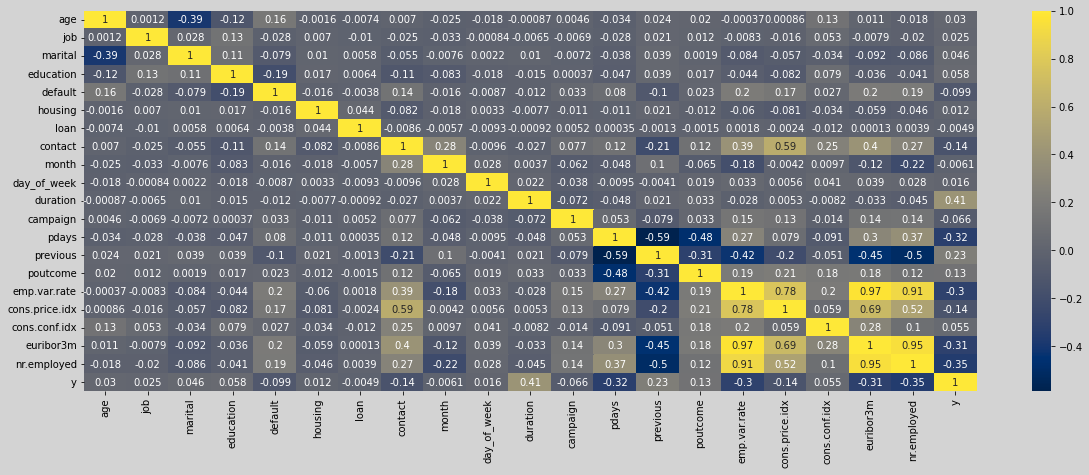

In [37]:
plt.figure(figsize=(20, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(x_corr, annot=True, cmap='cividis');
plt.show()

In [46]:
df["y"] = df.y

# Shuffle the dataset 
shuffle_df = df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(df))

# Split your dataset 
train_set = shuffle_df[:train_size]

test_set = shuffle_df[train_size:]

In [47]:
train_set.groupby(['y']).count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
0,25562,25562,25562,25562,25562,25562,25562,25562,25562,25562,25562,25562,25562,25562,25562,25562,25562,25562,25562,25562
1,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269


In [48]:
test_set.groupby(['y']).count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
0,10986,10986,10986,10986,10986,10986,10986,10986,10986,10986,10986,10986,10986,10986,10986,10986,10986,10986,10986,10986
1,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371


pycaret

In [49]:
from pycaret import classification

In [50]:
clf1 = classification.setup(data = train_set, target = 'y', session_id=123, log_experiment=True, experiment_name='sibm1')

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(28831, 21)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [51]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9161,0.9456,0.5020,0.6581,0.5692,0.5237,0.5298,3.098
lightgbm,Light Gradient Boosting Machine,0.9159,0.9467,0.5235,0.6484,0.5791,0.5330,0.5369,0.353
rf,Random Forest Classifier,0.9126,0.9388,0.4343,0.6594,0.5235,0.4776,0.4904,2.092
lr,Logistic Regression,0.9118,0.9317,0.4110,0.6631,0.5071,0.4617,0.4778,2.524
ada,Ada Boost Classifier,0.9101,0.9363,0.3949,0.6548,0.4921,0.4462,0.4636,0.878
lda,Linear Discriminant Analysis,0.9090,0.9342,0.4998,0.6075,0.5481,0.4981,0.5012,0.259
ridge,Ridge Classifier,0.9085,0.0000,0.3236,0.6821,0.4387,0.3958,0.4287,0.048
knn,K Neighbors Classifier,0.9036,0.8675,0.4733,0.5786,0.5200,0.4671,0.4703,0.923
et,Extra Trees Classifier,0.9024,0.9142,0.3393,0.6044,0.4343,0.3856,0.4050,2.275
svm,SVM - Linear Kernel,0.9012,0.0000,0.2608,0.6552,0.3307,0.2961,0.3395,0.834


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [52]:
classification_gbc = classification.create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9237,0.9563,0.5357,0.7059,0.6091,0.5678,0.5744
1,0.9118,0.9511,0.4619,0.6398,0.5365,0.4891,0.4971
2,0.9108,0.9402,0.4933,0.6215,0.5500,0.5012,0.5053
3,0.9197,0.9505,0.5157,0.6805,0.5867,0.5432,0.5496
4,0.9118,0.9456,0.4978,0.6271,0.5550,0.5068,0.5109
5,0.9182,0.9479,0.5022,0.6747,0.5758,0.5317,0.5388
6,0.9177,0.9423,0.5022,0.6707,0.5744,0.5299,0.5367
7,0.9138,0.9399,0.4574,0.6581,0.5397,0.4938,0.5038
8,0.9098,0.9336,0.5022,0.6120,0.5517,0.5021,0.5052
9,0.9232,0.9486,0.5516,0.6910,0.6135,0.5714,0.5759


In [54]:
tune_gbc = classification.tune_model(classification_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9178,0.9483,0.5179,0.6667,0.5829,0.5381,0.5434
1,0.9068,0.9476,0.4664,0.6012,0.5253,0.4745,0.4792
2,0.9103,0.9362,0.5112,0.6129,0.5575,0.5080,0.5106
3,0.9118,0.9443,0.5202,0.6203,0.5659,0.5172,0.5197
4,0.9108,0.9369,0.4484,0.6369,0.5263,0.4787,0.4877
5,0.9113,0.9378,0.4664,0.6341,0.5375,0.4897,0.4967
6,0.9138,0.9368,0.5022,0.6400,0.5628,0.5158,0.5204
7,0.9143,0.9326,0.4978,0.6453,0.5620,0.5154,0.5207
8,0.9034,0.9286,0.4888,0.5737,0.5278,0.4744,0.4763
9,0.9093,0.9397,0.5247,0.6031,0.5612,0.5109,0.5124


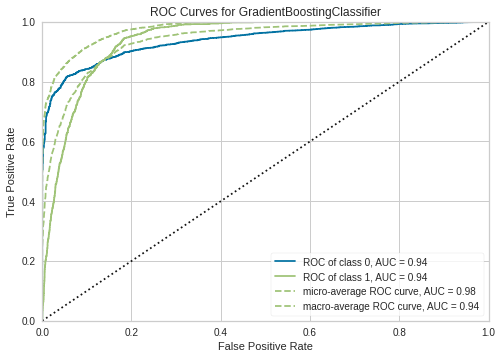

In [55]:
classification.plot_model(tune_gbc)

In [58]:
#! pip install shap

In [59]:
#classification.interpret_model(tune_gbc)

TypeError: ignored

In [60]:
predictions = classification.predict_model(tune_gbc, data = test_set)

In [61]:
predictions

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Label,Score
35398,43,1,2,3,0,0,0,0,6,0,504,2,999,0,1,-1.8,92.893,-46.2,1.250,5099.1,0,0,0.8817
41104,46,0,2,3,0,2,0,0,7,1,199,2,999,2,0,-1.1,94.767,-50.8,1.048,4963.6,0,0,0.9390
34439,29,7,1,3,0,2,0,0,6,2,343,2,999,0,1,-1.8,92.893,-46.2,1.266,5099.1,0,0,0.9269
36288,36,4,1,6,0,1,1,1,4,1,192,1,999,0,1,-2.9,92.963,-40.8,1.266,5076.2,0,0,0.9421
1809,43,0,1,6,1,2,0,1,6,0,2016,2,999,0,1,1.1,93.994,-36.4,4.855,5191.0,1,1,0.9147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,26,4,2,6,0,0,0,1,4,1,72,3,999,0,1,1.4,94.465,-41.8,4.865,5228.1,0,0,0.9960
15377,43,1,1,2,0,2,0,0,3,0,226,1,999,0,1,1.4,93.918,-42.7,4.957,5228.1,0,0,0.9942
17730,54,4,1,6,0,0,2,0,3,3,218,1,999,0,1,1.4,93.918,-42.7,4.961,5228.1,0,0,0.9939
28030,39,7,1,3,0,0,0,0,0,2,598,2,999,2,0,-1.8,93.075,-47.1,1.483,5099.1,0,0,0.9231


In [62]:
result_df = predictions[['age','Label']]

In [63]:
result_df.columns = ['age','y']

In [64]:
result_df.head()

,age,y
35398,43,0
41104,46,0
34439,29,0
36288,36,0
1809,43,1


In [65]:
result_df.to_csv('pycaretexploration_1.csv',index = False)

In [66]:

logs = classification.get_logs(save=True) # To save csv in working directory

In [67]:
logs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.TT,metrics.Prec.,metrics.Kappa,metrics.MCC,metrics.F1,metrics.Recall,metrics.AUC,metrics.Accuracy,params.n_iter_no_change,params.ccp_alpha,params.learning_rate,params.min_samples_leaf,params.criterion,params.min_impurity_split,params.max_leaf_nodes,params.presort,params.max_depth,params.min_weight_fraction_leaf,params.max_features,params.init,params.min_impurity_decrease,params.n_estimators,params.verbose,params.subsample,params.random_state,params.validation_fraction,params.min_samples_split,params.tol,params.loss,params.warm_start,params.reg_param,params.priors,params.store_covariance,params.var_smoothing,...,params.PCA Components,params.Clustering Iteration,params.PCA Method,params.Shuffle Train-Test,params.Fold Number,params.Numeric Binning,params.Group Features,params.Outliers Threshold,params.Categorical Imputer,params.Imputation Type,params.Target Type,params.Features Selection Threshold,params.High Cardinality Features,params.Stratify Train-Test,params.Ordinal Features,params.Remove Outliers,params.Transformed Train Set,params.Polynomial Features,params.Transformation,params.Remove Multicollinearity,params.Log Experiment,params.High Cardinality Method,params.CPU Jobs,params.Feature Interaction,params.Label Encoded,params.Fix Imbalance,params.Feature Selection,params.Missing Values,params.Iterative Imputation Iteration,params.Multicollinearity Threshold,tags.Run ID,tags.mlflow.user,tags.Source,tags.USI,tags.mlflow.runName,tags.mlflow.source.name,tags.URI,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.Run Time
0,06563bf3018149c2a116b9063f2c70b2,1,FINISHED,file:///content/mlruns/1/06563bf3018149c2a116b...,2021-11-02 18:36:10.266000+00:00,2021-11-02 18:36:10.571000+00:00,1.440,0.623400,0.502300,0.506700,0.55090,0.494400,0.938900,0.911000,None,0.0,0.4,4,friedman_mse,None,None,deprecated,7,0.0,sqrt,None,0.3,190,0,0.7,123,0.1,10,0.0001,deviance,False,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,06563bf3018149c2a116b9063f2c70b2,root,tune_model,5d17,Gradient Boosting Classifier,/usr/local/lib/python3.7/dist-packages/ipykern...,282f4f29,"[{""run_id"": ""06563bf3018149c2a116b9063f2c70b2""...",LOCAL,359.8
1,b93b90a7468341129c0df03da07dc5da,1,FINISHED,file:///content/mlruns/1/b93b90a7468341129c0df...,2021-11-02 18:24:20.567000+00:00,2021-11-02 18:24:20.859000+00:00,4.370,0.658115,0.523695,0.529758,0.56924,0.502002,0.945592,0.916059,None,0.0,0.1,1,friedman_mse,None,None,deprecated,3,0.0,None,None,0.0,100,0,1.0,123,0.1,2,0.0001,deviance,False,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,b93b90a7468341129c0df03da07dc5da,root,create_model,5d17,Gradient Boosting Classifier,/usr/local/lib/python3.7/dist-packages/ipykern...,a45b12fe,"[{""run_id"": ""b93b90a7468341129c0df03da07dc5da""...",LOCAL,35.63
2,9da5d088bd524eac92fcfc92db57dd64,1,FINISHED,file:///content/mlruns/1/9da5d088bd524eac92fcf...,2021-11-02 18:20:05.042000+00:00,2021-11-02 18:20:05.084000+00:00,0.134,0.111000,0.001000,0.009700,0.19940,0.980700,0.502100,0.129400,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0001,None,None,0.0,None,False,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,9da5d088bd524eac92fcfc92db57dd64,root,compare_models,5d17,Quadratic Discriminant Analysis,/usr/local/lib/python3.7/dist-packages/ipykern...,b6e19b42,"[{""run_id"": ""9da5d088bd524eac92fcfc92db57dd64""...",LOCAL,1.56
3,569cf8382d624f0894639a10e2b9245c,1,FINISHED,file:///content/mlruns/1/569cf8382d624f0894639...,2021-11-02 18:20:04.853000+00:00,2021-11-02 18:20:04.901000+00:00,0.049,0.446900,0.380300,0.380